In [ ]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dt_heart = pd.read_csv('data/heart.csv')
dt_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# preparacion_datos_pca
dt_features  = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

dt_features = StandardScaler().fit_transform(dt_features)

X_train, X_test, y_train, y_test = train_test_split(
    dt_features,
    dt_target,
    test_size=0.3,
    random_state=42
)
print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


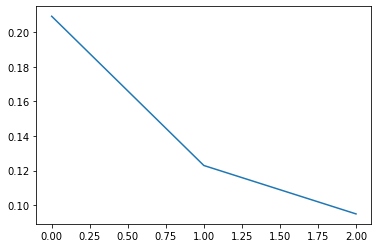

SCORE PCA:  0.7857142857142857
SCORE IPCA:  0.8051948051948052
SCORE KPCA:  0.7532467532467533


In [ ]:
# implementacion_algoritmo_pca
# n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train)

kpca = KernelPCA(n_components=3, kernel='poly')
kpca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

logistic = LogisticRegression(solver='lbfgs')

dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print("SCORE PCA: ", logistic.score(dt_test, y_test))

dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test))

dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)
logistic.fit(dt_train,y_train)
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>